### Informações do conjunto de dados:
Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.


Este dataset pode ser usado para problema de **regressão** (descobrir relação entre as features) e para **classificação** (descobrir a classe do vinho baseado nas características)

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Classificadores e métricas
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve 

# Algoritmos de Regressão e métricas 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print("Finalizado!")

sns.set()

Finalizado!


In [2]:
# Carregando dataset e printando as informações básicas
wine = load_wine(as_frame=True)
print('Classes: ', wine['target_names'])
print('Features: ', wine['feature_names'])
# Em forma de dataframe
df = pd.DataFrame(pd.concat([wine['data'], wine['target']], axis = 1))


print("Finalizado!")

Classes:  ['class_0' 'class_1' 'class_2']
Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Finalizado!


In [3]:
# Head do dataset
print(df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [4]:
# Tail do dataset
print(df.tail(5))

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  pro

In [5]:
# Quantas amostras em cada classe?
print(df['target'].value_counts())

1    71
0    59
2    48
Name: target, dtype: int64


In [6]:
# Características estatísticas do dataset
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

# Classificação 

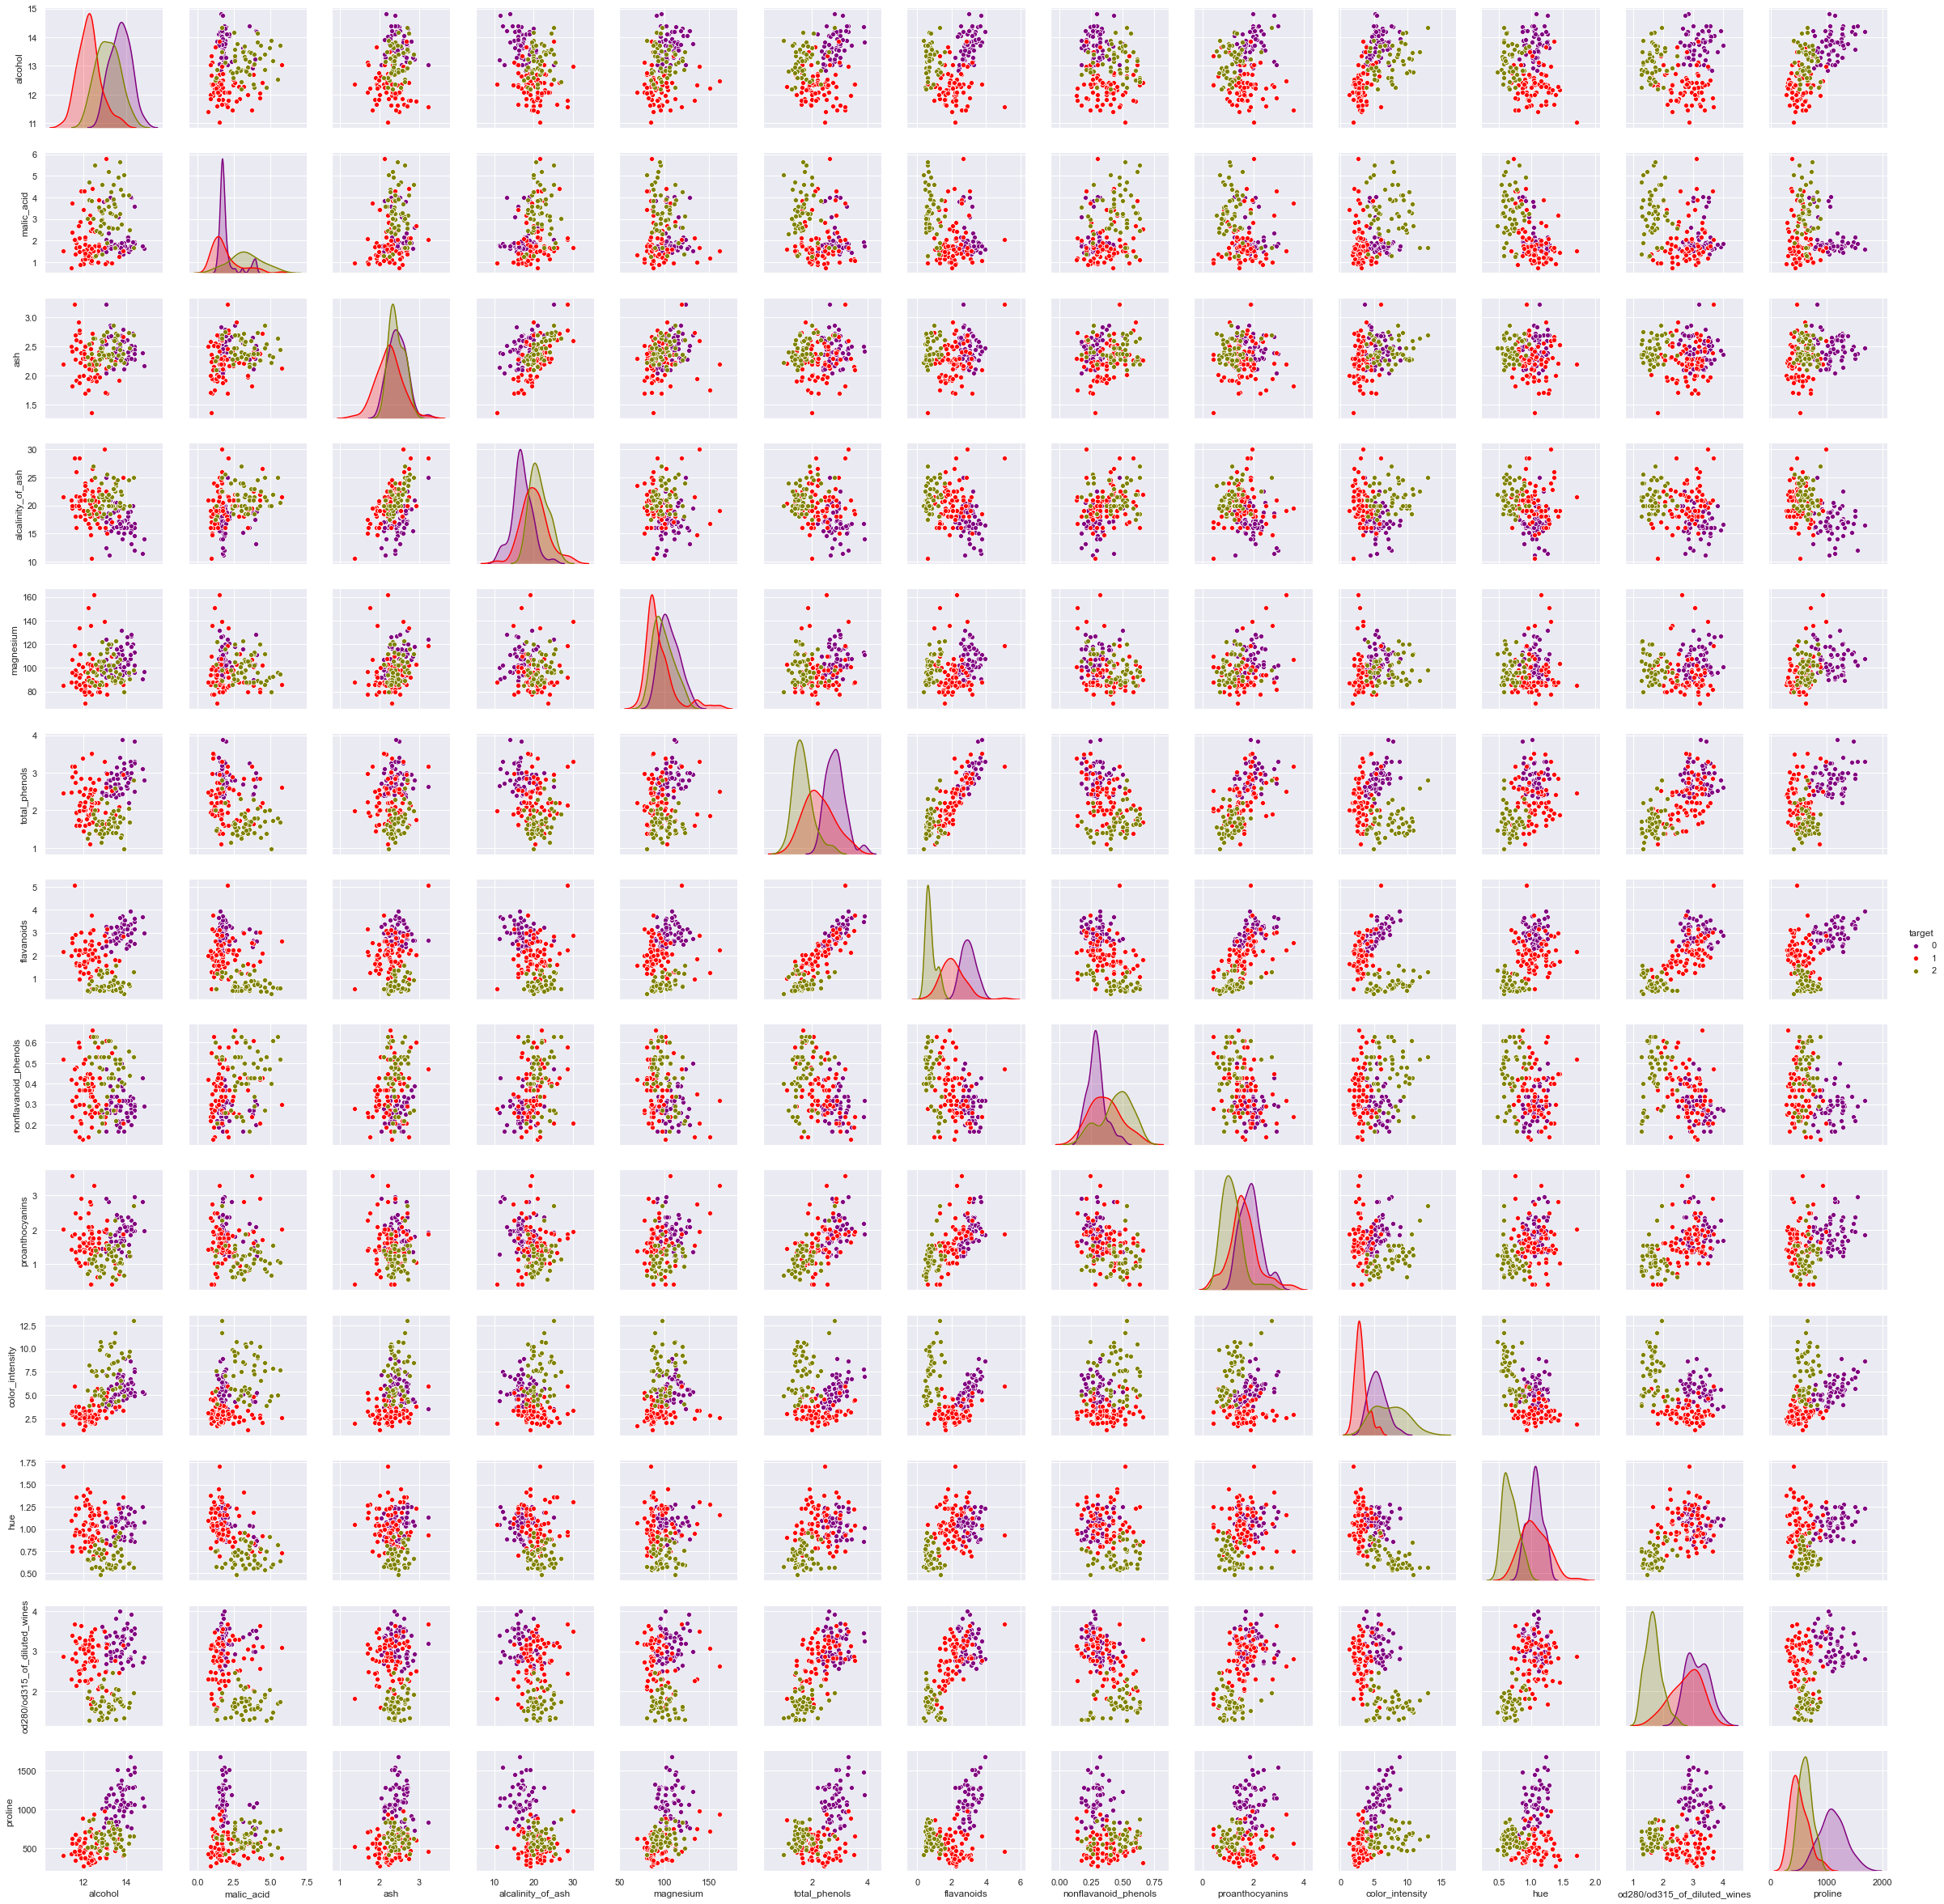

In [7]:
## Relações gráficas entre as features com separação por CLASSE (target)
sns.pairplot(data=df, hue='target', palette='brg')

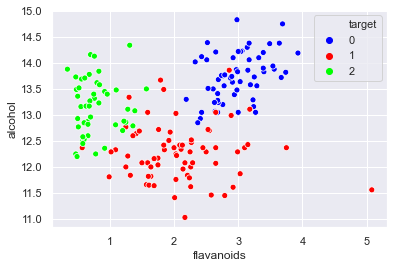

In [8]:
# Visualizando a relação entre Flavanoids x Alcohol para achar a classe do vinho. 
sns.scatterplot(df['flavanoids'], df['alcohol'], hue = df['target'], palette = 'brg')

In [9]:
# Montando X e y
x = df[['flavanoids', 'alcohol']].values
y = df['target'].values.reshape(-1,1)

x.shape, y.shape

((178, 2), (178, 1))

In [10]:
# Divida os dados em treino e teste (escolha uma divisão, use random_state=12 para reprodutibilidade)
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=12)

y_train = np.ravel(y_train)

Use os classificadores: Regressão Logistica, Decision Tree Classifier, KNN, Random Forest e SVC com valores default, observe quais tem os melhores resultados.
<br>Use as seguintes métricas: Acurácia e matriz de confusão (observe f1 score, precision e recall).

In [11]:
# Instancie os classificadores

logistic_reg = LogisticRegression(random_state = 0) # Regressão Logística
decision_tree = DecisionTreeRegressor(random_state = 0) # Decision Tree Classifier
knn = KNeighborsClassifier() # K-NeighborsClassifier
random_forest = RandomForestRegressor(random_state = 0) # Random Forest
svm = svm.LinearSVC(max_iter=10000, random_state=0) # Support Vector Classifier


In [12]:
# Treine os classificadores

y_train = np.ravel(y_train)
# Regressão Logística
logistic_reg.fit(x_train, y_train)

# Decision Tree Classifier
decision_tree.fit(x_train, y_train)

# K-NeighborsClassifier
knn.fit(x_train, y_train)

# Random Forest
random_forest.fit(x_train, y_train)

# Support Vector Classifier
svm.fit(x_train, y_train)

print("Finalizado!")

Finalizado!


In [13]:
# Avalie a acurácia dos Classificadores

# Regressão Logística
y_pred_logistic_reg = logistic_reg.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_logistic_reg))


# Decision Tree Classifier
y_pred_decision_tree = decision_tree.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_decision_tree))


# K-NeighborsClassifier
y_pred_knn = knn.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_knn))


# Random Forest
y_pred_random_forest = random_forest.predict(x_test)
y_train = y_train.reshape(-1,1)

print(random_forest.score(x_test, y_pred_random_forest))


# Support Vector Classifier
y_pred_svm = svm.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_svm))

0.9333333333333333
0.8888888888888888
0.8666666666666667
1.0
0.9333333333333333


Logistic Reg
[[17  2  0]
 [ 1 14  0]
 [ 0  0 11]]



Decision Tree Classifier
[[17  2  0]
 [ 0 15  0]
 [ 0  3  8]]



KNN
[[18  1  0]
 [ 0 12  3]
 [ 0  2  9]]



Random Forest
[[19  0  0]
 [ 6  9  0]
 [ 1  4  6]]



SVC / SVM
[[17  2  0]
 [ 1 14  0]
 [ 0  0 11]]





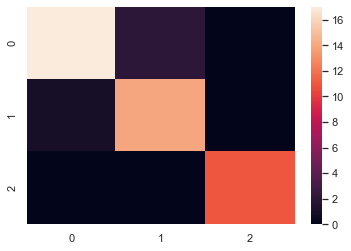

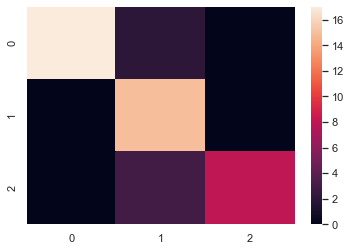

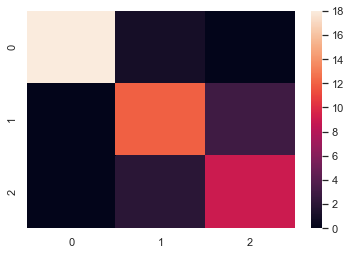

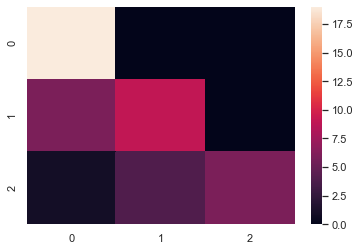

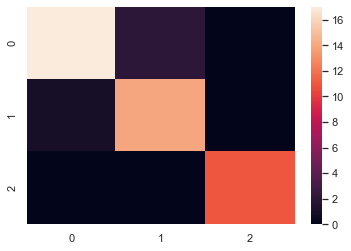

In [15]:
# Avalie a matriz confusão dos classificadores 

# Regressão Logística
cm_log_reg = confusion_matrix(y_test, y_pred_logistic_reg)
print("Logistic Reg")
print(cm_log_reg)
print('\n\n')


# Decision Tree Classifier
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Decision Tree Classifier")
print(cm_decision_tree)
print('\n\n')


# K-NeighborsClassifier
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN")
print(cm_knn)
print('\n\n')


# Random Forest
print("Random Forest")
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest.astype(int))
print(cm_random_forest)
print('\n\n')


# Support Vector Classifier
print("SVC / SVM")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print('\n\n')



tests = [cm_log_reg, cm_decision_tree, cm_knn, cm_random_forest, cm_svm]

for i in tests:
    sns.heatmap(i)
    plt.show()

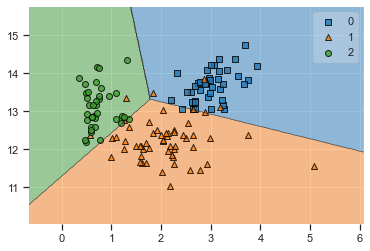

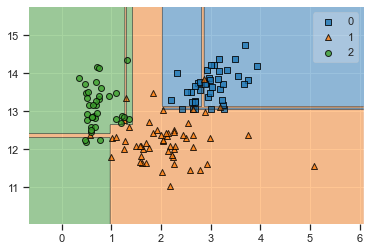

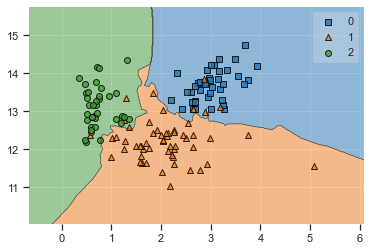

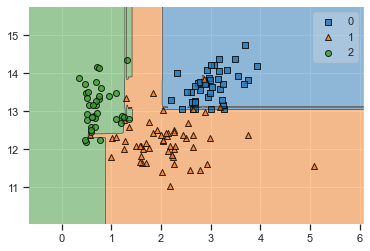

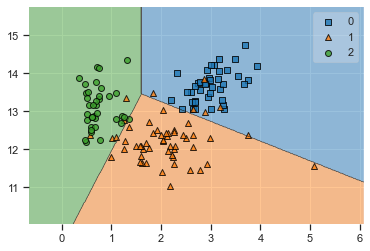

In [16]:
# Bônus: Plote as fronteiras de decisão dos classificadores.

# Regressão Logística
plot_decision_regions(x_train, y_train.flatten(), logistic_reg)
plt.show()
# Decision Tree Classifier
plot_decision_regions(x_train, y_train.flatten(), decision_tree)
plt.show()
# K-NeighborsClassifier
plot_decision_regions(x_train, y_train.flatten(), knn)
plt.show()
# Random Forest
plot_decision_regions(x_train, y_train.flatten(), random_forest)
plt.show()
# Support Vector Classifier
plot_decision_regions(x_train, y_train.flatten(), svm)
plt.show()



# Classificação usando todas as features 
Refaça o exercicio anterior utilizando todas as features

In [17]:
# Monte x e y
x = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']].values
y = df['target'].values

In [18]:
# Divida os dados em treino e teste (escolha uma divisão, use random_state=12 para reprodutibilidade)
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=12)

y_train = np.ravel(y_train)

In [19]:
# Instancie os classificadores
logistic_reg = LogisticRegression(random_state = 0) # Regressão Logística
decision_tree = DecisionTreeRegressor(random_state = 0) # Decision Tree Classifier
knn = KNeighborsClassifier() # K-NeighborsClassifier
random_forest = RandomForestRegressor(random_state = 0) # Random Forest
svm = svm.LinearSVC(max_iter=10000, random_state=0) # Support Vector Classifier

AttributeError: 'LinearSVC' object has no attribute 'LinearSVC'

In [ ]:
# Treine os classificadores

# Regressão Logística

logistic_reg.fit(x_train, y_train)

# Decision Tree Classifier
decision_tree.fit(x_train, y_train)

# K-NeighborsClassifier
knn.fit(x_train, y_train)

# Random Forest
random_forest.fit(x_train, y_train)

# Support Vector Classifier
svm.fit(x_train, y_train)

In [ ]:
# Avalie a acurácia dos Classificadores

# Regressão Logística
y_pred_logistic_reg = logistic_reg.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_logistic_reg))


# Decision Tree Classifier
y_pred_decision_tree = decision_tree.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_decision_tree))


# K-NeighborsClassifier
y_pred_knn = knn.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_knn))


# Random Forest
y_pred_random_forest = random_forest.predict(x_test)
y_train = y_train.reshape(-1,1)

print(random_forest.score(x_test, y_pred_random_forest))


# Support Vector Classifier
y_pred_svm = svm.predict(x_test)
y_train = y_train.reshape(-1,1)

print(accuracy_score(y_test, y_pred_svc))

In [ ]:
# Avalie a matriz confusão dos classificadores 

# Regressão Logística
cm_log_reg = confusion_matrix(y_test, y_pred_logistic_reg)
print("Logistic Reg")
print(cm_log_reg)
print('\n\n')


# Decision Tree Classifier
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Decision Tree Classifier")
print(cm_decision_tree)
print('\n\n')


# K-NeighborsClassifier
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN")
print(cm_knn)
print('\n\n')


# Random Forest
print("Random Forest")
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest.astype(int))
print(cm)
print('\n\n')


# Support Vector Classifier
print("SVC / SVM")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print('\n\n')



cms = [cm_log_reg, cm_decision_tree, cm_knn, cm_random_forest, cm_svm]

for i in cms:
    sns.heatmap(i)
    plt.show()

# Regressão 

Iremos observar a relação entre todas as features e plotar uma regressão para explicar a relação entre 2 features escolhidas.

In [ ]:
# Plotando relações gráficas entre as features
sns.pairplot(df)

In [ ]:
# Plotando correlação entre as features
df.corr()

Pela relação gráfica e correlação numérica podemos observar que é possível explicar a relação entre total_phenols e flavanoids através de uma reta de regressão.

Aplique os algoritmos de regressão e as métricas aprendidas (MAE, RMSE e R2):

In [ ]:
plt.scatter(data=df, x='flavanoids', y = 'total_phenols')

In [ ]:
# Associe a X e Y as novas váriveis (flavanoids e total_phenols)

In [ ]:
# Divida os dados em treino e teste (escolha uma divisão, use random_state=12 para reprodutibilidade)

In [ ]:
# Instancie os regressores (Linear Regression, DecisionTreeRegressor, RandomForestRegressor)

In [ ]:
# Treine os classificadores

In [ ]:
# Avalie R2, MAE e RSME

In [ ]:
# Bônus: Plote os gráficos